In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("indiaCrime.csv")

In [3]:
df.head()

,Unnamed: 0,STATE/UT,YEAR,POPULATION,MALES,FEMALES,MALES(per_100k),FEMALES(per_100k),TOTAL IPC CRIMES,TOTAL IPC CRIMES(per_100k),...,RAPE,RAPE(per_100k),RIOTS,RIOTS(per_100k),ROBBERY,ROBBERY(per_100k),THEFT,THEFT(per_100k),OTHER IPC CRIMES,OTHER IPC CRIMES(per_100k)
0,0,A&N Islands,2001,356,193,163,54213.483146,45786.516854,1316,369662.921348,...,6,1685.393258,26,7303.370787,8,2247.191011,130,36516.853933,646,181460.674157
1,1,Andhra Pradesh,2001,76210,38527,37683,50553.733106,49446.266894,260178,341396.142239,...,1742,2285.789267,6002,7875.606876,1258,1650.702008,33502,43960.110222,68688,90129.904212
2,2,Arunachal Pradesh,2001,1098,580,518,52823.315118,47176.684882,4684,426593.806922,...,66,6010.928962,48,4371.584699,168,15300.546448,886,80692.167577,1236,112568.306011
3,3,Assam,2001,26656,13777,12878,51684.423770,48311.824730,73754,276688.175270,...,1634,6129.951981,5906,22156.362545,1374,5154.561825,10734,40268.607443,18630,69890.456182
4,4,Bihar,2001,82999,43244,39755,52101.832552,47898.167448,176864,213091.723997,...,1776,2139.784817,17212,20737.599248,4406,5308.497693,19402,23376.185255,73334,88355.281389


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 68 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Unnamed: 0                                                     468 non-null    int64  
 1   STATE/UT                                                       468 non-null    object 
 2   YEAR                                                           468 non-null    int64  
 3   POPULATION                                                     468 non-null    int64  
 4   MALES                                                          468 non-null    int64  
 5   FEMALES                                                        468 non-null    int64  
 6   MALES(per_100k)                                                468 non-null    float64
 7   FEMALES(per_100k)                                             

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df=pd.get_dummies(df,["STATE/UT"])

In [7]:
df=df.drop(["Unnamed: 0"],axis=1)

In [8]:
#i saw this code block from another notebook, so go and check him page for more -> https://www.kaggle.com/devraai
threshold = df['OTHER IPC CRIMES(per_100k)'].median()
df['HIGH_CRIME'] = (df['OTHER IPC CRIMES(per_100k)'] > threshold).astype(int)

In [9]:
y=df['HIGH_CRIME']
x=df.drop(["HIGH_CRIME"],axis=1)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=31)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models=[
    KNeighborsClassifier(),
    LogisticRegression(),
    RidgeClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [28]:
def evaluateModels(models):
    results = []
    for x in models:
        x.fit(x_train, y_train)
        score = x.score(x_test, y_test)
        results.append((x.__class__.__name__, score))
    return results


In [29]:
results = evaluateModels(models)


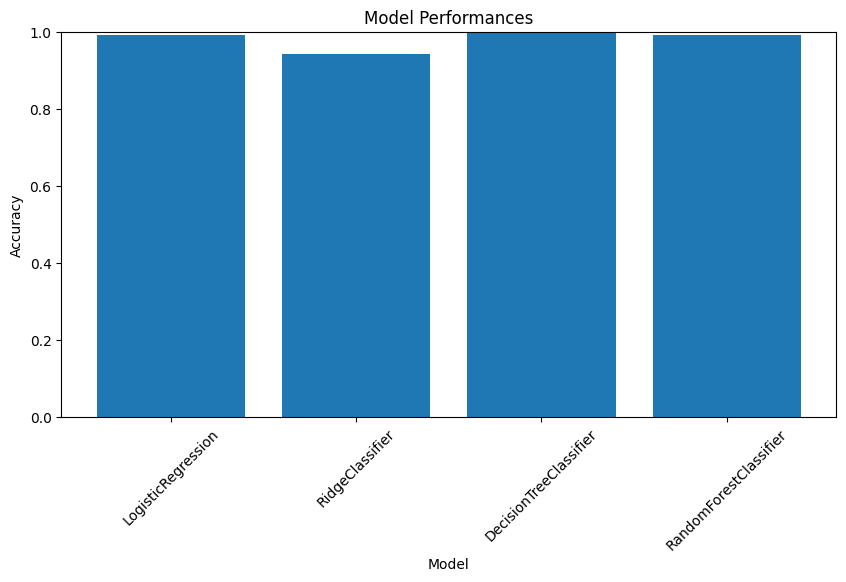

In [30]:
model_names = [name for name, score in results]
scores = [score for name, score in results]
plt.figure(figsize=(10, 5))
plt.bar(model_names, scores)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Model Performances")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()